<a href="https://colab.research.google.com/github/DCI-alxogm/ML2023/blob/main/Sep8-9/LR_SKLearn_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [180]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [185]:
#Load data
houses=np.loadtxt("/content/drive/MyDrive/DCI_data/ML2023/houses.txt",delimiter=',')
Xh=houses[:,:4]
th=houses[:,4] #Costo de la Casa"
labels=["Tamaño","# habitaciones","pisos","Años"]

In [186]:
scaler = StandardScaler()
Xh_norm = scaler.fit_transform(Xh)

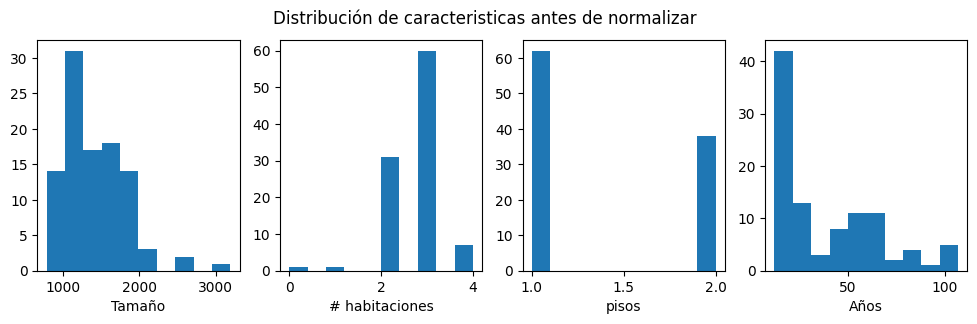

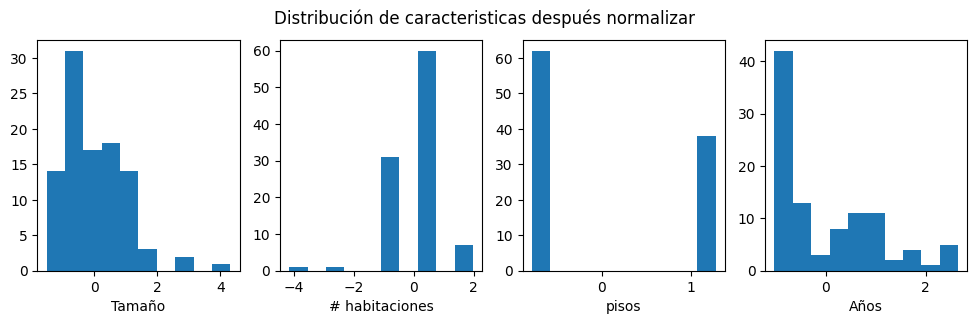

In [187]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3))
for i in range(len(ax)):
    ax[i].hist(Xh[:,i])
    ax[i].set_xlabel(labels[i])
fig.suptitle("Distribución de caracteristicas antes de normalizar ")
plt.show()

fig,ax=plt.subplots(1, 4, figsize=(12, 3))
for i in range(len(ax)):
    ax[i].hist(Xh_norm[:,i])
    ax[i].set_xlabel(labels[i])
fig.suptitle("Distribución de caracteristicas después normalizar ")
plt.show()

In [188]:
sgdr = SGDRegressor(max_iter=1000, learning_rate='constant', eta0=0.1)
sgdr.fit(Xh_norm, th)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor(eta0=0.1, learning_rate='constant')
number of iterations completed: 7, number of weight updates: 701.0


In [189]:
w0_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w0_norm}, b:{w_norm}")

model parameters:                   w: [372.47320575], b:[112.45339233 -20.9362614  -27.57406827 -31.31163078]


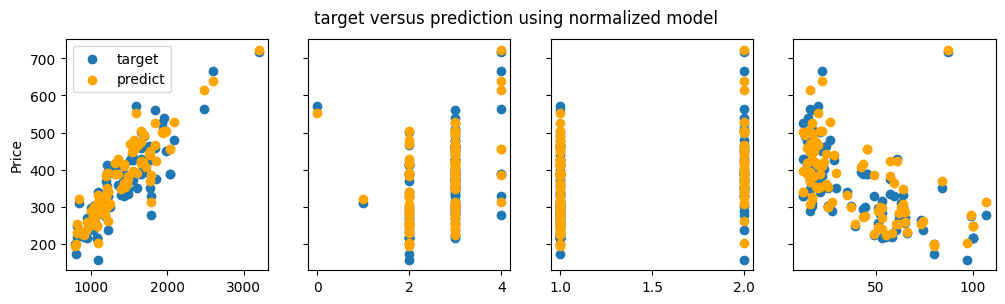

In [190]:
#predict target using normalized features
yp = w0_norm[0]
for i in range(len(w_norm)):
  yp+=w_norm[i]*Xh_norm[:,i]

    # plot predictions and targets versus original features
fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(Xh[:,i],th, label = 'target')
    ax[i].scatter(Xh[:,i],yp,color="orange", label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using normalized model")
plt.show()

In [190]:
#USING LIBRARIES

In [43]:
#Split in Train and Test samples.

In [40]:
X_train, X_test, y_train, y_test = train_test_split(Xh_norm, th, test_size=0.30, random_state=42)

In [164]:
#Solve using Scikit learn

sgdr = SGDRegressor(max_iter=100, loss="squared_error",learning_rate='constant', eta0=0.01,penalty=None)
sgdr.fit(X_train, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor(learning_rate='constant', max_iter=100, penalty=None)
number of iterations completed: 27, number of weight updates: 1891.0


In [165]:
w0_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w0_norm}, b:{w_norm}")

model parameters:                   w: [361.63218427], b:[110.5464707  -21.74232436 -34.71053055 -38.73490629]


In [170]:
#Usando KERAS
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

np.random.seed(2)
model = Sequential()

In [171]:
input_dim = 4
output_dim = 1
model.add(Dense(output_dim, input_dim=input_dim, activation='linear'))
sgd = SGD(learning_rate=0.01)
model.compile(loss='mse', optimizer=sgd)
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 1)                 5         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [172]:
num_epochs = 100
batch_size = 30
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size)

Epoch 1/100
3/3 [==============================] - 0s 5ms/step - loss: 136700.1875
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 121670.2266
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 106420.2422
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 93928.8906
Epoch 5/100
3/3 [==============================] - 0s 4ms/step - loss: 83327.1406
Epoch 6/100
3/3 [==============================] - 0s 4ms/step - loss: 73552.3516
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 64576.1016
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 57294.2070
Epoch 9/100
3/3 [==============================] - 0s 4ms/step - loss: 51007.6484
Epoch 10/100
3/3 [==============================] - 0s 5ms/step - loss: 45510.4023
Epoch 11/100
3/3 [==============================] - 0s 4ms/step - loss: 40401.6016
Epoch 12/100
3/3 [==============================] - 0s 4ms/step - loss: 36047.1797
Epoch 13/1

In [174]:
capas = model.layers[0]
w, b = capas.get_weights()
print(w,b)

[[ 95.87848 ]
 [-15.896474]
 [-28.630136]
 [-42.69223 ]] [359.96158]


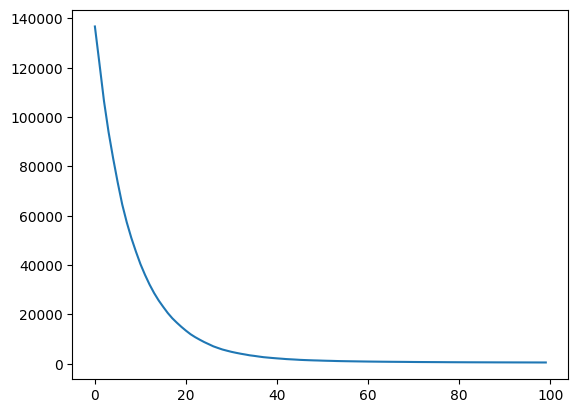

In [175]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();

In [176]:
history2= model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size)

Epoch 1/100
3/3 [==============================] - 0s 9ms/step - loss: 514.0985
Epoch 2/100
3/3 [==============================] - 0s 8ms/step - loss: 512.7781
Epoch 3/100
3/3 [==============================] - 0s 8ms/step - loss: 507.5942
Epoch 4/100
3/3 [==============================] - 0s 6ms/step - loss: 504.3763
Epoch 5/100
3/3 [==============================] - 0s 11ms/step - loss: 501.6100
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 502.3742
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 497.0438
Epoch 8/100
3/3 [==============================] - 0s 8ms/step - loss: 495.9644
Epoch 9/100
3/3 [==============================] - 0s 18ms/step - loss: 492.5692
Epoch 10/100
3/3 [==============================] - 0s 12ms/step - loss: 489.3498
Epoch 11/100
3/3 [==============================] - 0s 9ms/step - loss: 486.5247
Epoch 12/100
3/3 [==============================] - 0s 12ms/step - loss: 485.4702
Epoch 13/100
3/3 [===============

In [177]:
capas = model.layers[0]
w, b = capas.get_weights()
print(w,b)

[[108.50931 ]
 [-21.043383]
 [-33.756645]
 [-39.18417 ]] [361.64624]


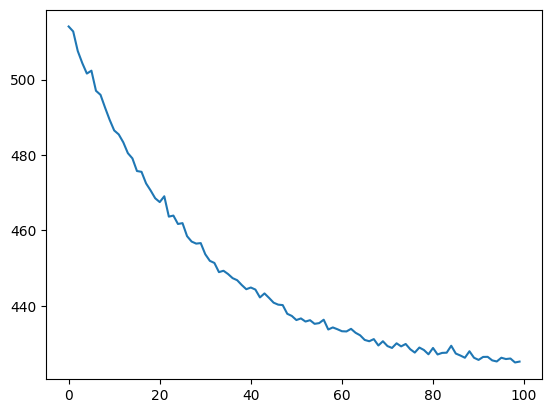

In [179]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history2.history)
# use Pandas native plot method
history_df['loss'].plot();